# Three-dimensional Plotting in Matplotlib
How to create and display a wide variety of 3D objects and patterns in matplotlib.

By Jake VanderPlas May 4, 2015

# Three-dimensional Plotting in Matplotlib

Matplotlib was designed to be a two-dimensional plotting library. Around the time of the 1.0 release, some 3D plotting utilities were built on top of matplotlib’s 2D display, and the result is a convenient (if somewhat limited) set of tools for three-dimensional data visualization. 3D plots are enabled by importing the mplot3d submodule:

In [8]:
# from: quantlabs.net
# source: https://beta.oreilly.com/learning/three-dimensional-plotting-in-matplotlib?imm_mid=0d697c&cmp=em-data-na-na-newsltr_20150812

from mpl_toolkits import mplot3d

Once this submodule is imported, a three-dimensional axes can be created by passing the keyword projection='3d' to any of the normal axes creation routines:

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

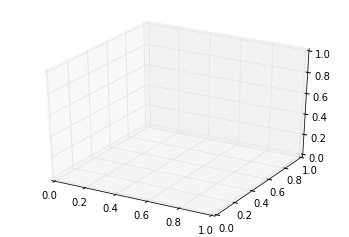

In [10]:
fig = plt.figure()
ax = plt.axes(projection='3d')

With this 3D axes enabled, we can now plot a variety of three-dimensional plot types, as we’ll see below. Three-dimensional plotting is one of the functionalities which benefits immensely from viewing figures interactively rather than statically in the notebook; recall that to use interactive figures, you can either run a stand-alone Python script with the plt.show() command, or in the IPython notebook switch to the non-inline backend using the magic command %matplotlib rather than the usual %matplotlib inline.

#3D Points and Lines

The most basic 3D plot is a line or collection of scatter plot created from sets of (x, y, z) triples. In analogy with the more common two-dimensional discussed earlier, these can be created using the ax.plot3D and ax.scatter3D functions. The call signature for these is nearly identical to that of their two-dimensional counterparts, so you can refer to recipe X.X for more information on controlling the output. Here we’ll plot a trigonometric spiral, along with some data drawn about the line:

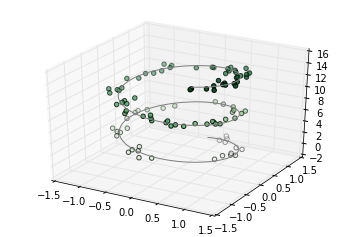

In [11]:
ax = plt.axes(projection='3d')

# Data for a 3D line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for 3D scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

Notice that by default, the scatter points have their transparency adjusted to give a sense of depth on the page. While the 3D effect is sometimes difficult to see within a static image, an interactive view can lead to some nice intuition about the layout of the points.

# 3D Contour Plots

Analogous to the contour plots we explored briefly in recipe X.X, mplot3d contains tools to create three-dimensional relief plots using the same inputs. Like two-dimensional ax.contour plots, ax.contour3D requires all the input data to be in the form of two-dimensional regular grids, with the Z data evaluated at each point. Here we’ll show a 3D contour diagram of a three-dimenisonal sinusoidal function:

In [12]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

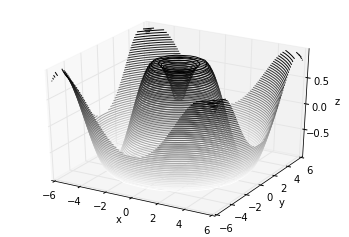

In [13]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

Sometimes the default viewing angle is not optimal; in this case we can use the view_init method to set the elevation and azimuthal angles. Here we’ll use an elevation of 60 degrees (that is, 60 degrees above the x-y plane) and an azimuth of 35 degrees (that is, rotated 35 degrees counter-clockwise about the z-axis):

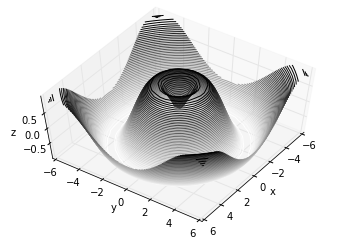

In [14]:
ax.view_init(60, 35)
fig

Again, note that this type of rotation can be accomplished interactively by clicking and dragging when using one of matplotlib’s interactive backends.

#Wireframes and Surface Plots

Two other types of 3D plots which work on gridded data are wireframes and surface plots. These take a grid of values and project it onto the specified three-dimensional surface, and can make the resulting three-dimensional forms quite easy to visualize:

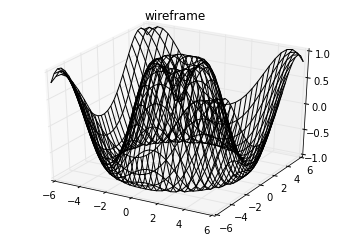

In [15]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');

A surface plot is like a wireframe plot, but each face of the wireframe is a filled polygon. Adding a colormap to the filled polygons can aid perception of the topology of the surface being visualized:

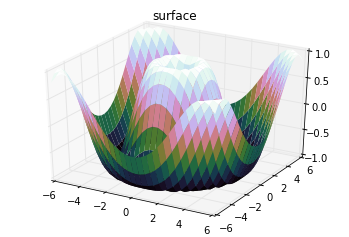

In [16]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='cubehelix', edgecolor='none')
ax.set_title('surface');

Note that though the grid of values for a surface plot needs to be two-dimensional, it need not be rectilinear. Here is an example of creating a partial polar grid, which when used with the surface3D plot can give us a slice into the function we’re visualizing:

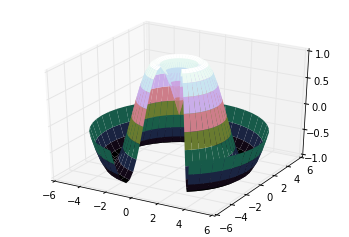

In [17]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='cubehelix', edgecolor='none');

# Surface Triangulations

For some applications, the rectilinear grid required by the above routines is overly restrictive and inconvenient. In these situations, the triangulation-based plots can be very useful. What if rather than an even draw from a cartesian or a polar grid, we instead have a set of random draws?

In [18]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

We could create a scatterplot of the points to get an idea of the surface we’re sampling from:

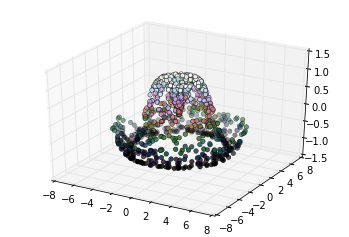

In [19]:
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='cubehelix', linewidth=0.5);

This leaves a lot to be desired. The function that will help us in this case is ax.plot_trisurf, which creates a surface by first finding a set of triangles formed between adjacent points. Remember that x, y, and z here are one-dimensional arrays.

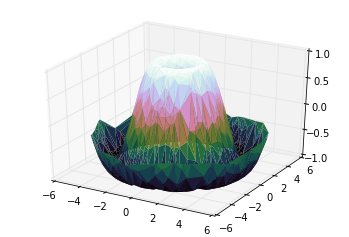

In [20]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,
                cmap='cubehelix', edgecolor='none');

The result is certainly not as clean as when it is plotted with a grid, but the flexibility of such a triangulation allows for some really interesting 3D plots. For example, it is actually possible to plot a 3D Mobius strip using this, as we’ll see next.

#Triangulation Example: Creating A Mobius Strip

The key to creating the mobius strip is to think about it’s parametrization: it’s a two-dimensional strip, so we need two intrinsic dimensions. Let’s call them θ, which ranges from 0 to 2π around the loop, and w which ranges from -1 to 1 across the width of the strip.

Let’s create this parametrization:

In [22]:
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)

Now from this parametrization, we must determine the (x,y,z) positions of the embedded strip.

The key to creating the mobius strip is to recognize that there are two rotations happening: one is the position of the loop about its center (what we’ve called θ), while the other is the twisting of the strip about its axis (we’ll call this ϕ). For a Mobuis strip, we must have the strip makes half a twist during a full loop, or Δπ=Δθ/2.

In [26]:
phi = 0.5 * theta

Now we use simple geometry to derive the three-dimensional embedding. We’ll define r, the distance of each point from the center, and use this to find the embedded (x,y,z) coordinates:

In [27]:
# radius in x-y plane
r = 1 + w * np.cos(phi)

x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

Finally, to plot the object, we must make sure the triangulization is correct. The best way to do this is to define the triangularization within the underlying parametrization, and then let matplotlib project this triangulation into the 3-dimensional space of the Mobius strip. This can be accomplished as follows:

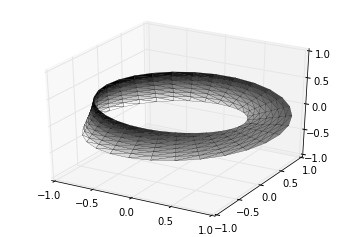

In [28]:
# triangulate in the underlying parametrization
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))

ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles,
                cmap='binary', linewidths=0.2);

ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);

Combining the above techniques, it is possible to create and display a wide variety of 3D objects and patterns in matplotlib.